## Libraries

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

pd.set_option('display.max_columns', None) # Displays all columns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for previews

def view(df,n):
    with pd.option_context('display.max_rows',n*2):
        display(df)

## Individuals in Crashes

https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Individual-Information-Three/ir4y-sesj

#### Preview

In [3]:
ind = pd.read_csv('Motor_Vehicle_Crashes_-_Individual_Information__Three_Year_Window.csv')
ind = ind[ind['Year']==2016]
view(ind,3)

,Year,Case Individual ID,Case Vehicle ID,Victim Status,Role Type,Seating Position,Ejection,License State Code,Sex,Transported By,Safety Equipment,Injury Descriptor,Injury Location,Injury Severity,Age
0,2016,401901,13365167,NaN,Registrant,Not Entered,NaN,NaN,U,NaN,NaN,NaN,NaN,Uninjured,NaN
1,2016,401902,13365696,NaN,Registrant,Not Entered,NaN,NaN,U,NaN,NaN,NaN,NaN,Uninjured,NaN
2,2016,401904,13367206,NaN,Registrant,Not Entered,NaN,NaN,U,NaN,NaN,NaN,NaN,Uninjured,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747797,2016,19505120,14867165,Conscious,Passenger of a Motor Vehicle in Transport,Passenger - 3 Front Right,Not Ejected,NaN,M,Unknown,Lap Belt/Harness,Complaint of Pain,Neck,Minor,14.0
747798,2016,19508301,14869334,Not Entered,Driver of a Motor Vehicle in Transport,Driver,Unknown,NY,M,Not Entered,Lap Belt/Harness,"Momentary unconsciousness, limping, nausea, hy...",Not Entered,Minor,20.0
747799,2016,19508931,13689911,Unknown,Passenger of a Motor Vehicle in Transport,Passenger - 3 Front Right,Unknown,NaN,M,Not Entered,Lap Belt/Harness,Complaint of Pain,Entire Body,Injured with Unkn Severity,NaN


#### Column Descriptions

From the Data Dictionary for NYS Crash Individual Dataset

* **Year:** Calendar year of incident
* **Case Individual ID:** ID assigned to the individual in the crash case. This is strictly a database key and not a personal identifier such as a driver license number.
* **Case Vehicle ID:** ID assigned to the vehicle in the crash case. This is strictly a database key, and not a vehicle identifier such as a VIN or plate number.
* **Victim Status:** Reported status of the individual in the crash, at the time of the crash.
* **Role Type:** Reported role of the individual in the crash.
* **Seating Position:** Reported seating position description of the individual in the crash.
* **Ejection:** Reported notice of whether the individual was ejected from the vehicle.
* **License State Code:** Code associated with individual’s state of license. 2 digit Post Office state code is used. If unknown, field is blank.
* **Sex:** Sex of individual. M = “Male” F = “Female” U = “Unknown”
* **Transported By:** Reported method used for individual to be transported from the crash scene.
* **Safety Equipment:** Reported safety equipment used by the individual in the crash.
* **Injury Descriptor:** Reported injury description for the individual in the crash.
* **Injury Location:** Reported injury location for the individual in the crash.
* **Injury Severity:** Reported severity of the injury sustained by the individual.
* **Age:** Reported age of the individual in the crash.

#### Info

In [4]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747800 entries, 0 to 747799
Data columns (total 15 columns):
Year                  747800 non-null int64
Case Individual ID    747800 non-null int64
Case Vehicle ID       747800 non-null int64
Victim Status         717552 non-null object
Role Type             747800 non-null object
Seating Position      747800 non-null object
Ejection              717552 non-null object
License State Code    503316 non-null object
Sex                   747781 non-null object
Transported By        681977 non-null object
Safety Equipment      681977 non-null object
Injury Descriptor     681977 non-null object
Injury Location       681977 non-null object
Injury Severity       747800 non-null object
Age                   703285 non-null float64
dtypes: float64(1), int64(3), object(11)
memory usage: 91.3+ MB


#### Describe

In [5]:
ind.describe()

,Year,Case Individual ID,Case Vehicle ID,Age
count,747800.0,7.478000e+05,7.478000e+05,703285.000000
mean,2016.0,1.745009e+07,1.387816e+07,38.833206
std,0.0,3.514219e+06,2.643900e+05,19.137647
min,2016.0,4.019010e+05,1.336418e+07,0.000000
25%,2016.0,1.783550e+07,1.366642e+07,24.000000
50%,2016.0,1.814357e+07,1.387936e+07,36.000000
75%,2016.0,1.845702e+07,1.409874e+07,53.000000
max,2016.0,1.950893e+07,1.486933e+07,95.000000


#### Column Values

YEAR



2016    747800
Name: Year, dtype: int64

None


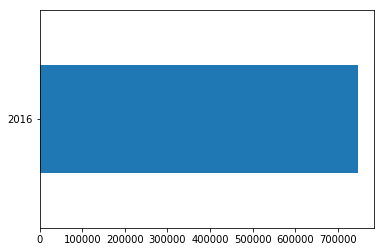


**************************************************

CASE INDIVIDUAL ID



401901      1
401902      1
401904      1
401905      1
401906      1
           ..
19505118    1
19505119    1
19505120    1
19508301    1
19508931    1
Name: Case Individual ID, Length: 747800, dtype: int64

None


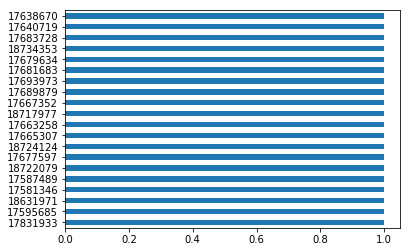


**************************************************

CASE VEHICLE ID



13364180    2
13364181    1
13364182    1
13364283    1
13364291    1
           ..
14867087    1
14867164    1
14867165    2
14869240    1
14869334    1
Name: Case Vehicle ID, Length: 560607, dtype: int64

None


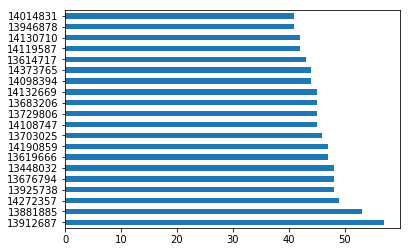


**************************************************

VICTIM STATUS



Apparent Death       583
Conscious         138980
Incoherent           909
Not Applicable    333238
Not Entered       234564
Semiconscious       1806
Shock               2691
Unconscious         1099
Unknown             3682
Name: Victim Status, dtype: int64

None


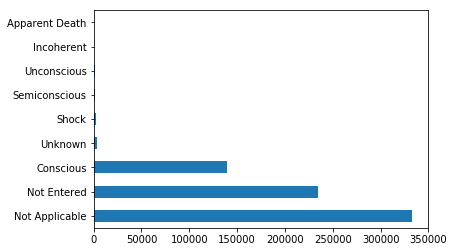


**************************************************

ROLE TYPE



Bicyclist (operator)                                                                             6320
Bicyclist (passenger)                                                                              36
Driver -- Missing Information                                                                   26519
Driver of a Motor Vehicle in Transport                                                         469944
Other Pedestrians (occupants of transport device used as equipment, occupant in a building)       337
Passenger of a Motor Vehicle in Transport                                                      187157
Pedestrian                                                                                      15492
Registrant                                                                                      41995
Name: Role Type, dtype: int64

None


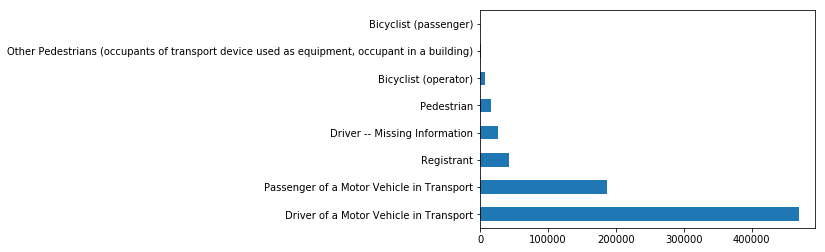


**************************************************

SEATING POSITION



Driver                           496289
Not Applicable                    15862
Not Entered                       49621
Passenger - 2 Front Middle         4206
Passenger - 3 Front Right         89344
                                  ...  
Passenger - 6 Back Right          33037
Passenger - 7 Back Cargo Area     15877
Riding/Hanging on Outside           149
Unknown Position In Vehicle         450
Unknown Seating Passenger          6651
Name: Seating Position, Length: 12, dtype: int64

None


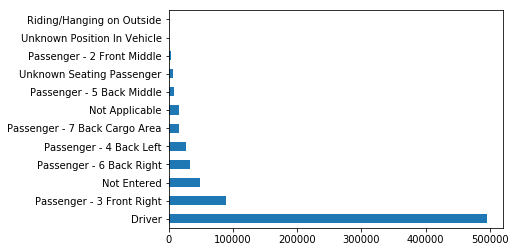


**************************************************

EJECTION



Ejected                5380
Not Applicable        16344
Not Ejected          622624
Not Entered           46054
Partially Ejected      1557
Unknown               25593
Name: Ejection, dtype: int64

None


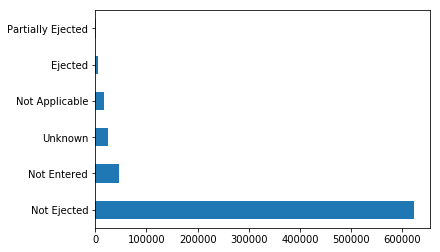


**************************************************

LICENSE STATE CODE



AB     10
AK     22
AL    123
AR     66
AZ    260
     ... 
WI     98
WV     64
WY     18
YT      2
ZS    109
Name: License State Code, Length: 86, dtype: int64

None


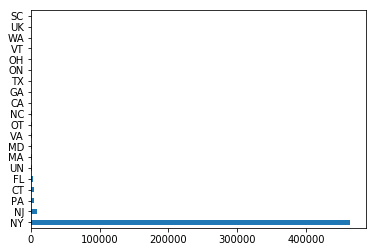


**************************************************

SEX



F    312693
M    402423
U     32665
Name: Sex, dtype: int64

None


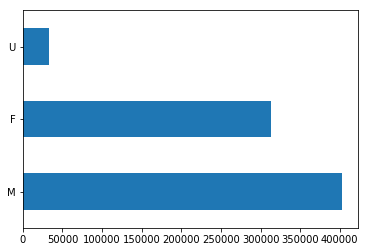


**************************************************

TRANSPORTED BY



Ambulance (Unknown plate number)                   9397
Coroner's Van or Municipal Emergency Equipment      706
Fire Vehicle                                      12149
Helicopter                                          850
Invalid Coach (Funeral)                              65
                                                  ...  
Police Ambulance                                  14689
Police Car                                          368
Private Vehicle                                    2943
Unknown                                           45309
Unknown Ambulance                                 17831
Name: Transported By, Length: 12, dtype: int64

None


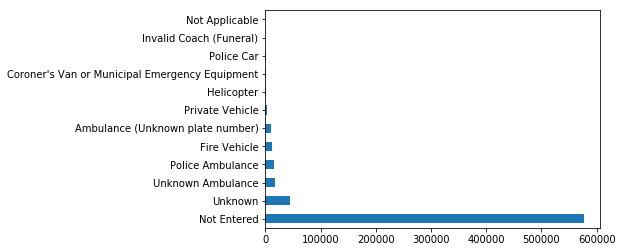


**************************************************

SAFETY EQUIPMENT



Air Bag Deployed                      2848
Air Bag Deployed/Child Restraint       388
Air Bag Deployed/Harness              1276
Air Bag Deployed/Lap Belt             1994
Air Bag Deployed/Lap Belt/Harness    29199
                                     ...  
None                                 20774
Not Applicable                       17482
Not Entered                          10307
Other*                                 622
Unknown                              58495
Name: Safety Equipment, Length: 19, dtype: int64

None


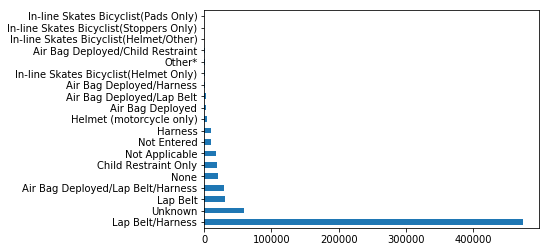


**************************************************

INJURY DESCRIPTOR



Abrasion                                                                                                                                                                                                 3963
Amputation                                                                                                                                                                                                 86
Complaint of Pain                                                                                                                                                                                      100975
Concusion                                                                                                                                                                                                1115
Contusion - Bruise                                                                                                                                                              

None


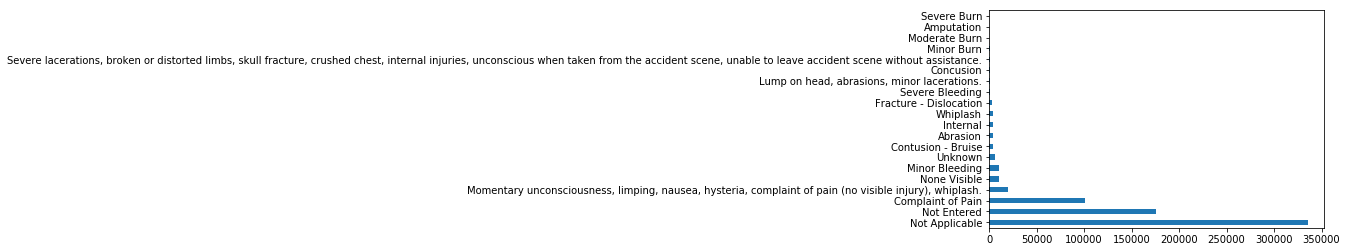


**************************************************

INJURY LOCATION



Abdomen-Pelvis            3278
Back                     21346
Chest                    10062
Elbow-Lower Arm-Hand     11596
Entire Body               9509
                         ...  
Neck                     28752
Not Applicable          336257
Not Entered             196041
Shoulder-Upper Arm        8741
Unknown                   8445
Name: Injury Location, Length: 15, dtype: int64

None


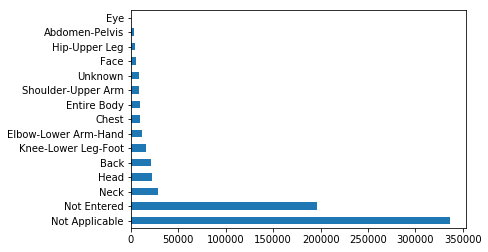


**************************************************

INJURY SEVERITY



Injured with Unkn Severity      7976
Killed                          1029
Minor                         130788
Moderate                       19619
Severe                         11501
Uninjured                     576887
Name: Injury Severity, dtype: int64

None


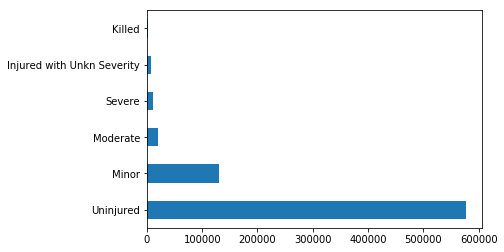


**************************************************

AGE



0.0     2072
1.0     3845
2.0     3413
3.0     3377
4.0     3461
        ... 
91.0     407
92.0     308
93.0     199
94.0     165
95.0     100
Name: Age, Length: 96, dtype: int64

None


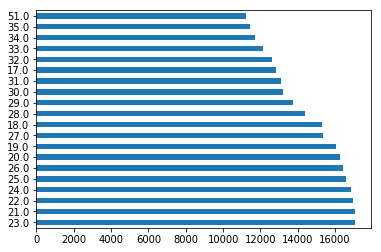


**************************************************



In [6]:
for i in ind.columns:
    print(i.upper())
    print()
    print(view(ind[i].value_counts().sort_index(),5))
    ind[i].value_counts().head(20).plot(kind='barh')
    plt.show()
    print()
    print('*'*50)
    print()

## Preprocessing

### Renaming Columns

In [7]:
# Renaming the columns for easier handling

ind.columns = ['year', 
               'ind_id', 
               'veh_id', 
               'status', 
               'role', 
               'seating', 
               'ejection', 
               'dl_state', 
               'sex', 
               'transported_by', 
               'safety_equipment', 
               'injury_description', 
               'injury_location', 
               'injury_severity', 
               'age']

### Dropping Unnecessary Columns

My objective is to assess the factors that contribut to whether or not someone is injured in a car accident. I will remove the following columns, which do not provide any information that will be helpful to work with:

* **Year:** We cut down the dataset to entries only from 2016, so this column no longer provides any information
* **Victim Status:** The large majority of entries in this column are not entered or not applicable
* **Ejection:** The large majority of these individuals were not ejected. Also, it can be assumed that if an individual was ejected from the vehicle, there was a definite injury
* **License State Code:** The large majority of the values in this column are NY. That makes sense, because most of the cases likely involve NY residents, and you need a NY driver's license to be able to drive in NY
* **Transported By, Injury Descriptor, and Injury Location:** These columns contain information, given an injury. Because I am already binning the entries into injured vs. uninjured, these columns are irrelevant

In [8]:
ind = ind.drop(columns=['year',
                        'status',
                        'ejection',
                        'dl_state',
                        'transported_by',
                        'injury_description',
                        'injury_location'])

### Checking Null Values

There are quite a few in some of the columns. I am planning to trim down several columns, so I will see how that affects the null value count.

In [9]:
# Null values count

ind.isna().sum()

ind_id                  0
veh_id                  0
role                    0
seating                 0
sex                    19
safety_equipment    65823
injury_severity         0
age                 44515
dtype: int64

### Fixing Each Column

#### Seating and Role

I only want to work with data from drivers and passengers of motor vehicles, so I will remove entries for anyone who does not fit in either of these categories.

In [10]:
ind = ind[(ind.seating.str.contains('Driver|Passenger ')) & (ind.role.str.contains('Driver of|Passenger'))]

In [11]:
# No longer need the role column, because information is redundant with seating column

ind = ind.drop(columns=['role'])

In [12]:
# Simplifying seating names of Driver and Passengers

ind.seating.replace('Driver','driver',inplace=True)
ind.seating.replace('Passenger - 2 Front Middle', 'pass_frontmid', inplace=True)
ind.seating.replace('Passenger - 3 Front Right', 'pass_frontright', inplace=True)
ind.seating.replace('Passenger - 4 Back Left', 'pass_backleft', inplace=True)
ind.seating.replace('Passenger - 5 Back Middle', 'pass_backmid', inplace=True)
ind.seating.replace('Passenger - 6 Back Right', 'pass_backright', inplace=True)
ind.seating.replace('Passenger - 7 Back Cargo Area', 'pass_backcargo', inplace=True)

In [13]:
ind.seating.value_counts()

driver             460978
pass_frontright     89343
pass_backright      33036
pass_backleft       27151
pass_backcargo      15877
pass_backmid         9121
pass_frontmid        4206
Name: seating, dtype: int64

#### Sex

In [14]:
ind.sex.value_counts()

M    357165
F    281560
U       987
Name: sex, dtype: int64

In [15]:
len(ind[ind.sex == 'U'])/len(ind)

0.0015428817968085639

Sex is an important feature. Entries with 'U' for unknown make up only 0.05% of the data, so I will remove these rows.

In [16]:
ind = ind[~(ind.sex == 'U')]

In [17]:
ind.sex = ind.sex.str.lower()

#### Age

In [18]:
# Null values count

print(ind.age.isna().sum())
print(ind.age.isna().sum()/len(ind))

9727
0.015228776077341579


Age is an important feature that needs to be continuous, but there are 10,348 missing values. That makes up less than 2% of the total data. I will drop all remaining rows with null values.

In [19]:
ind = ind[~ind.age.isna()]

#### Safety Equipment

In [20]:
ind.safety_equipment.value_counts()

Lap Belt/Harness                         466231
Unknown                                   50857
Air Bag Deployed/Lap Belt/Harness         29016
Lap Belt                                  28759
Child Restraint Only                      17219
None                                      15388
Harness                                    9379
Helmet (motorcycle only)                   4272
Air Bag Deployed                           2781
Air Bag Deployed/Lap Belt                  1968
Air Bag Deployed/Harness                   1261
Not Applicable                              987
Other*                                      514
Air Bag Deployed/Child Restraint            364
In-line Skates Bicyclist(Helmet Only)         2
Name: safety_equipment, dtype: int64

The Safety Equipment column is really messy and includes multiple cases. I will feature engineer this to create new columns:

* **airbag:** if an airbag deployed
* **seatbelt:** if a harness was worn (I will assume that if a harness was worn, it was also worn with a lapbelt)
* **lapbelt_only:** if a lapbelt was worn with no harness (common in middle seats)
* **childrestraint:** if a child restraint was worn

In [21]:
ind["airbag"] = ind.safety_equipment.where(ind.safety_equipment.str.contains("Air Bag"), False)
ind["airbag"] = ind.airbag.where(ind.airbag == False, True)

In [22]:
ind["seatbelt"] = ind.safety_equipment.where(ind.safety_equipment.str.contains("Harness"), False)
ind["seatbelt"] = ind.seatbelt.where(ind.seatbelt == False, True)

In [23]:
ind["lapbelt_only"] = ind.safety_equipment.where(ind.safety_equipment.str.contains("Lap Belt") \
                    & (ind.seatbelt==False), False)
ind["lapbelt_only"] = ind.lapbelt_only.where(ind.lapbelt_only == False, True)

In [24]:
ind["childrestraint"] = ind.safety_equipment.where(ind.safety_equipment.str.contains("Child Restraint"), False)
ind["childrestraint"] = ind.childrestraint.where(ind.childrestraint == False, True)

In [25]:
# No longer need this column

ind = ind.drop(columns='safety_equipment')

#### Changing the Target to Binary

Our target is Injury - we want to classify whether or not there was an injury for this individual.

In [26]:
ind.injury_severity = ind.injury_severity.where(ind.injury_severity == 'Uninjured', 'Injured')
ind["injured"] = ind.injury_severity.replace('Injured',True).replace('Uninjured',False)

In [27]:
# No longer need this column

ind = ind.drop(columns='injury_severity')

#### Fixing Data Types

Age is the only column that should be numeric, and it should be an int type. It could not be changed earlier, while there were still null values in it, but I can change it now. The Individual ID and Vehicle ID are displayed as int type, but these are actually identifiers and not continuous. I will change the datatype for those columns to str.

In [28]:
ind.ind_id = ind.ind_id.astype(str)
ind.veh_id = ind.veh_id.astype(str)
ind.age = ind.age.astype(int)

In [29]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628998 entries, 30248 to 747798
Data columns (total 10 columns):
ind_id            628998 non-null object
veh_id            628998 non-null object
seating           628998 non-null object
sex               628998 non-null object
age               628998 non-null int64
airbag            628998 non-null object
seatbelt          628998 non-null object
lapbelt_only      628998 non-null object
childrestraint    628998 non-null object
injured           628998 non-null bool
dtypes: bool(1), int64(1), object(8)
memory usage: 48.6+ MB


## Checking

#### Preview

In [30]:
view(ind,3)

,ind_id,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured
30248,17475364,13364180,driver,f,24,True,True,False,False,True
30249,17475365,13364180,pass_backmid,m,1,False,False,False,True,False
30250,17475366,13364181,driver,m,27,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
747796,19505119,14867165,driver,f,45,False,True,False,False,True
747797,19505120,14867165,pass_frontright,m,14,False,True,False,False,True
747798,19508301,14869334,driver,m,20,False,True,False,False,True


#### Info

In [31]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628998 entries, 30248 to 747798
Data columns (total 10 columns):
ind_id            628998 non-null object
veh_id            628998 non-null object
seating           628998 non-null object
sex               628998 non-null object
age               628998 non-null int64
airbag            628998 non-null object
seatbelt          628998 non-null object
lapbelt_only      628998 non-null object
childrestraint    628998 non-null object
injured           628998 non-null bool
dtypes: bool(1), int64(1), object(8)
memory usage: 48.6+ MB


#### Describe

In [32]:
ind.describe()

,age
count,628998.000000
mean,38.361852
std,19.203991
min,0.000000
25%,23.000000
50%,36.000000
75%,53.000000
max,95.000000


#### Checking for Null Values

In [33]:
ind.isna().sum()

ind_id            0
veh_id            0
seating           0
sex               0
age               0
airbag            0
seatbelt          0
lapbelt_only      0
childrestraint    0
injured           0
dtype: int64

#### Number of Unique Values

In [34]:
[f'{c}: {ind[c].nunique()}' for c in ind.columns]

['ind_id: 628998',
 'veh_id: 461547',
 'seating: 7',
 'sex: 2',
 'age: 96',
 'airbag: 2',
 'seatbelt: 2',
 'lapbelt_only: 2',
 'childrestraint: 2',
 'injured: 2']

#### Column Values

IND_ID



17475364    1
17475365    1
17475366    1
17475367    1
17475510    1
           ..
19504241    1
19505118    1
19505119    1
19505120    1
19508301    1
Name: ind_id, Length: 628998, dtype: int64

None


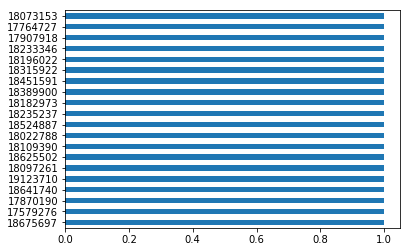


**************************************************

VEH_ID



13364180    2
13364181    1
13364182    1
13364283    1
13364291    1
           ..
14866398    1
14866399    1
14867164    1
14867165    2
14869334    1
Name: veh_id, Length: 461547, dtype: int64

None


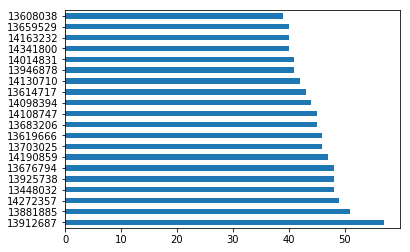


**************************************************

SEATING



driver             459942
pass_backcargo      13568
pass_backleft       25852
pass_backmid         8544
pass_backright      31531
pass_frontmid        3771
pass_frontright     85790
Name: seating, dtype: int64

None


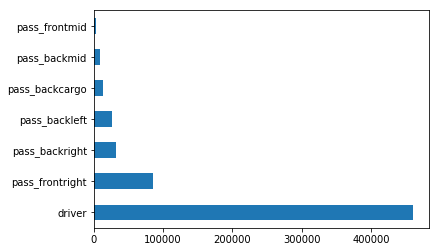


**************************************************

SEX



f    276909
m    352089
Name: sex, dtype: int64

None


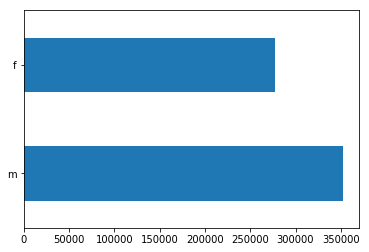


**************************************************

AGE



0     2037
1     3651
2     3274
3     3216
4     3294
      ... 
91     360
92     280
93     172
94     154
95      96
Name: age, Length: 96, dtype: int64

None


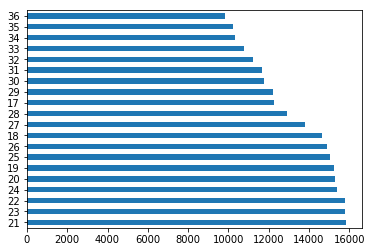


**************************************************

AIRBAG



False    593608
True      35390
Name: airbag, dtype: int64

None


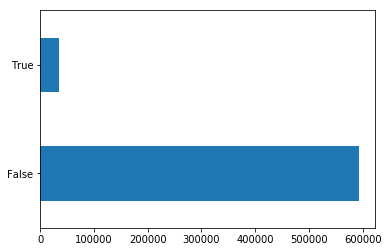


**************************************************

SEATBELT



False    123111
True     505887
Name: seatbelt, dtype: int64

None


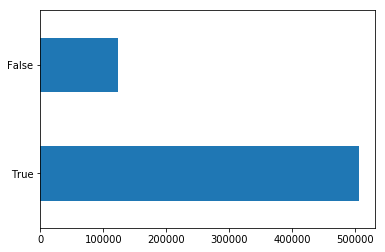


**************************************************

LAPBELT_ONLY



False    598271
True      30727
Name: lapbelt_only, dtype: int64

None


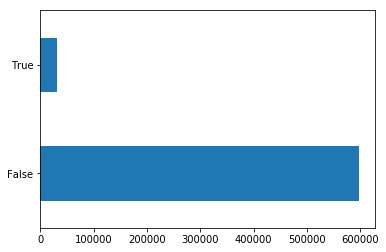


**************************************************

CHILDRESTRAINT



False    611415
True      17583
Name: childrestraint, dtype: int64

None


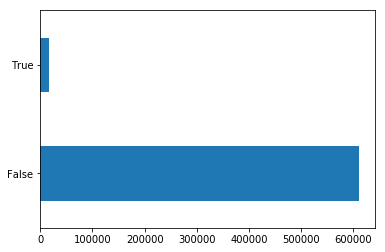


**************************************************

INJURED



False    484669
True     144329
Name: injured, dtype: int64

None


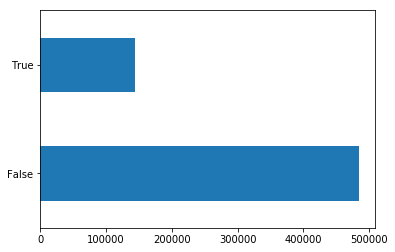


**************************************************



In [35]:
for i in ind.columns:
    print(i.upper())
    print()
    print(view(ind[i].value_counts().sort_index(),5))
    ind[i].value_counts().head(20).plot(kind='barh')
    plt.show()
    print()
    print('*'*50)
    print()

## Exporting Dataframe

In [36]:
ind.to_csv(r'individuals.csv')